In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [5]:
import pandas as pd

import json

with open('reviews.json') as json_data:
    d = json.load(json_data)
    print(d)

[{'rating': ['1.0 out of 5 stars'], 'title': ['One Star'], 'author': ['Lauren Walsh'], 'date': ['on April 9, 2018'], 'body': ['Ridiculously small. You are mislead by the picture on the site.'], 'helpful': []}, {'rating': ['1.0 out of 5 stars'], 'title': ['The one that does is mediocre at best.'], 'author': ['Bradey Christensen'], 'date': ['on April 9, 2018'], 'body': ['Only one works. The one that does is mediocre at best.'], 'helpful': []}, {'rating': ['5.0 out of 5 stars'], 'title': ['Five Stars'], 'author': ['John Weber'], 'date': ['on April 9, 2018'], 'body': ['Most: size, uses 2A battery, adjustable light beam. Least: the method used to change the light mode.'], 'helpful': []}, {'rating': ['5.0 out of 5 stars'], 'title': ['Five Stars'], 'author': ['K Reed'], 'date': ['on April 9, 2018'], 'body': ['Awesome little light, highly recommend'], 'helpful': []}, {'rating': ['5.0 out of 5 stars'], 'title': ['Five Stars'], 'author': ['BW'], 'date': ['on April 9, 2018'], 'body': ['Durable, l

In [6]:
from pandas.io.json import json_normalize
data = json_normalize(d[:])
data_frame = pd.DataFrame.from_dict(data, orient='columns')
df = data_frame.applymap(str)
df

,author,body,date,helpful,rating,title
0,['Lauren Walsh'],['Ridiculously small. You are mislead by the p...,"['on April 9, 2018']",[],['1.0 out of 5 stars'],['One Star']
1,['Bradey Christensen'],['Only one works. The one that does is mediocr...,"['on April 9, 2018']",[],['1.0 out of 5 stars'],['The one that does is mediocre at best.']
2,['John Weber'],"['Most: size, uses 2A battery, adjustable ligh...","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
3,['K Reed'],"['Awesome little light, highly recommend']","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
4,['BW'],"['Durable, lightweight and very bright']","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
5,['allena'],['Very good quality lights for the size of fla...,"['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
6,['Oscar A Campos'],['They work great. Flashlights are small but d...,"['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
7,['Laura'],['Great little bright light!'],"['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
8,['Emanuel'],['Great product..'],"['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
9,['LL'],"['These are compact size flashlights, fit in p...","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Compact and useful']


In [4]:
df.rating.describe()

count                       1360
unique                         5
top       ['5.0 out of 5 stars']
freq                         863
Name: rating, dtype: object

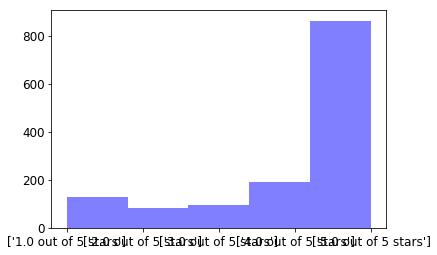

In [22]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(df.rating, 5, facecolor='blue', alpha=0.5)
plt.show()

In [23]:
df.head()

,author,body,date,helpful,rating,title
0,['Lauren Walsh'],['Ridiculously small. You are mislead by the p...,"['on April 9, 2018']",[],['1.0 out of 5 stars'],['One Star']
1,['Bradey Christensen'],['Only one works. The one that does is mediocr...,"['on April 9, 2018']",[],['1.0 out of 5 stars'],['The one that does is mediocre at best.']
2,['John Weber'],"['Most: size, uses 2A battery, adjustable ligh...","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
3,['K Reed'],"['Awesome little light, highly recommend']","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
4,['BW'],"['Durable, lightweight and very bright']","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']


In [24]:
df.columns
df.index

RangeIndex(start=0, stop=1360, step=1)

In [25]:
df.describe()

,author,body,date,helpful,rating,title
count,1360,1360,1360,1360,1360,1360
unique,820,924,341,10,5,624
top,['Amazon Customer'],['Great product'],"['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
freq,135,8,34,1136,863,317


In [26]:
df['rating'].value_counts()

['5.0 out of 5 stars']    863
['4.0 out of 5 stars']    191
['1.0 out of 5 stars']    128
['3.0 out of 5 stars']     94
['2.0 out of 5 stars']     84
Name: rating, dtype: int64

In [52]:
df['helpful'].value_counts()

[]                                                  1136
['\n      One person found this helpful.\n    ']     134
['\n      2 people found this helpful.\n    ']        53
['\n      3 people found this helpful.\n    ']        18
['\n      4 people found this helpful.\n    ']         8
['\n      5 people found this helpful.\n    ']         3
['\n      6 people found this helpful.\n    ']         3
['\n      15 people found this helpful.\n    ']        2
['\n      8 people found this helpful.\n    ']         2
['\n      214 people found this helpful.\n    ']       1
Name: helpful, dtype: int64

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(lowercase=True, stop_words='english',ngram_range=(2, 2))
cv = CountVectorizer(lowercase=True, stop_words='english', max_features=20, binary=True)
data = cv.fit_transform(df.body)
print(data.toarray())
cv.get_feature_names()

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


['aa',
 'battery',
 'bright',
 'flashlight',
 'flashlights',
 'good',
 'great',
 'just',
 'light',
 'lights',
 'like',
 'little',
 'nice',
 'price',
 'quality',
 'really',
 'size',
 'small',
 'use',
 'work']

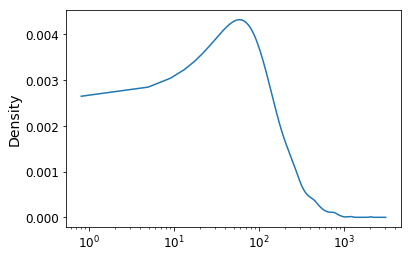

In [7]:
reviews = df.body
review_lengths = reviews.apply(lambda r: len(r))
review_lengths.plot(kind='kde', logx=True)

In [21]:
review_lengths

0        67
1        58
2       104
3        42
4        40
5        55
6        86
7        30
8        19
9       229
10      276
11      174
12       43
13      283
14      210
15      119
16      480
17      920
18       28
19      342
20       46
21       39
22      166
23      243
24       37
25      397
26      111
27      238
28      433
29      163
       ... 
1330    272
1331    444
1332    214
1333    226
1334    850
1335     23
1336    147
1337     13
1338     31
1339     21
1340    227
1341    112
1342     63
1343     92
1344    357
1345     63
1346    231
1347    224
1348     45
1349    218
1350    285
1351     20
1352    244
1353     26
1354    166
1355     88
1356    137
1357    180
1358    761
1359    271
Name: body, Length: 1360, dtype: int64

In [8]:
### data preprocessing:
### score data was not in a numerical form so that needed to be taken care of 
### using if the review was helpful or not could be a good indicator of if others gave it a similar rating
### usefulness was then turned into a binary variable (1 if useful, 0 if not)
### names of reviewers was also found to be an important feature but it became evident that incincere
### reviews may come from overly dramaticized names so names were converted into name length 
### this will encompass two word names (since they get an extra 1 in their length) and superfluous
### single names. (so if you get a 1* review from fhwefhardgfsvsdv or Mrs. Dunwa Regionia ) the 
### two names would be considered similar regardless of stylistic composition of the name itself
training, validation = df.iloc[:681, :], df.iloc[681:, :]

for i in training.index:
    if df['rating'][i] == "['5.0 out of 5 stars']":
        df['rating'][i] = 5.0
    elif df['rating'][i] == "['4.0 out of 5 stars']":
        df['rating'][i] = 4.0
    elif df['rating'][i] == "['3.0 out of 5 stars']":
        df['rating'][i] = 3.0
    elif df['rating'][i] == "['2.0 out of 5 stars']":
        df['rating'][i] = 2.0
    elif df['rating'][i] == "['1.0 out of 5 stars']":
        df['rating'][i] = 1.0
for i in df.index:
    if df['helpful'][i] == "[]":
        df['helpful'][i] = 0.0
for i in df.index:
    if df['helpful'][i] != 0.0:
        df['helpful'][i] = 1.0
        
for i in training.index:
        a = df['author'][i]
        name_len = len(a)
        df['author'][i] = name_len
        
for i in training.index:
        df['body'][i] = review_lengths[i]
        
W = training.loc[:, 'author']
#name length 
X = training.loc[:, 'body']
#review length 
Y = training.loc[:, 'rating']
#score
Z = training.loc[:,'helpful']
#binary 1 yes people found it helpful, 0 no 

pd.value_counts(Z)

0.0    572
1.0    109
Name: helpful, dtype: int64

In [67]:
training

,author,body,date,helpful,rating,title
0,16,67,"['on April 9, 2018']",0,1,['One Star']
1,22,58,"['on April 9, 2018']",0,1,['The one that does is mediocre at best.']
2,14,104,"['on April 9, 2018']",0,5,['Five Stars']
3,10,42,"['on April 9, 2018']",0,5,['Five Stars']
4,6,40,"['on April 9, 2018']",0,5,['Five Stars']
5,10,55,"['on April 9, 2018']",0,5,['Five Stars']
6,18,86,"['on April 9, 2018']",0,5,['Five Stars']
7,9,30,"['on April 9, 2018']",0,5,['Five Stars']
8,11,19,"['on April 9, 2018']",0,5,['Five Stars']
9,6,229,"['on April 9, 2018']",0,5,['Compact and useful']


In [11]:
import statsmodels.formula.api as sm
ols = sm.ols(formula="Y ~ W + X + Z", data = training).fit()
ols.params

,0,1,2,3,4
Intercept,0.115196,-0.021433,0.978707,-0.084695,0.012226
W[T.6],0.335939,0.040323,-1.090897,-0.038830,0.753465
W[T.7],0.504363,0.048402,-1.045863,0.103468,0.389630
W[T.8],0.265598,0.139578,-0.906891,-0.037865,0.539580
W[T.9],0.394369,0.081716,-1.025070,-0.017706,0.566691
W[T.10],0.315834,-0.064008,-1.022305,0.088638,0.681841
W[T.11],0.301686,-0.104073,-1.029555,0.212893,0.619049
W[T.12],0.420442,0.029348,-1.099074,-0.047468,0.696752
W[T.13],0.277174,0.158703,-1.071040,-0.068833,0.703997
W[T.14],0.301967,-0.102036,-1.137838,0.059998,0.877909


In [17]:
W = W.astype(float)
X = X.astype(float)
Y = Y.astype(float)
Z = Z.astype(float)
#ols1 = ols.get_robustcov_results(cov_type='HAC',maxlags=1)
ols1 = sm.ols(formula="Y ~ W + X + Z", data = training).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     10.52
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           9.02e-07
Time:                        14:41:36   Log-Likelihood:                -1178.6
No. Observations:                 681   AIC:                             2365.
Df Residuals:                     677   BIC:                             2383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3466      0.167     26.097      0.000       4.020       4.674
W             -0.0081      0.011     -0.749      0.454      -0.029       0.013
X             -0.0006      0.000     -1.955      0.051      -0.001    2.31e-06
Z             -0.6630      0.150     -4.424      0.000      -0.957      -0.369
==============================================================================
Omnibus:                       91.840   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.529
Skew:                          -1.065   Prob(JB):                     7.47e-29
Kurtosis:                       2.834   Cond. No.                         796.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(ols1, training, validation, scoring='accuracy')
print(scores)


TypeError: estimator should be an estimator implementing 'fit' method, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000001B8042E8> was passed

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
#clf.fit()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()